## Importing Libsraries

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import calendar

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Importing CSV files

In [2]:
merged_df = pd.read_csv('merged_df_Mar27th_19.csv',
                        parse_dates=["Start_Time", "End_Time", "merge_time", "Date/Time"])



## Handling Outliers

In [3]:
# Cleaning the dataset
def remove_outliers(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
#     print(upper_limit)
    return df[(df[variable] < upper_limit)]
merged_df = remove_outliers(merged_df,"Duration")

#Converting From float to Integer
merged_df.shape[0]

11661157

## Checking Subscribers

In [4]:
df_subID = merged_df[(merged_df['Start_Time'].dt.year == 2020) | (merged_df['Start_Time'].dt.year == 2019) ]

In [5]:
df_subID["Start_Station_id"] = df_subID["Start_Station_id"].astype('Int64')
df_subID["End_Station_id"] = df_subID["End_Station_id"].astype('Int64')
df_subID["Subscription Id"] = df_subID["Subscription Id"].astype('Int64')
df_subID["Bike Id"] = df_subID["Bike Id"].astype('Int64')
df_subID["Year"] = df_subID["Year"].astype('Int64')
df_subID["Month"] = df_subID["Month"].astype('Int64')
df_subID["Day"] = df_subID["Day"].astype('Int64')


In [6]:
df_subID.head()

,ID,Start_Time,End_Time,Duration,Start_Station_id,Start_Station_name,End_Station_id,End_Station_name,User_Type,Subscription Id,...,Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Stn Press Flag,Hmdx,Wind Chill,Weather
3383541,4581278,2019-01-01 00:08:00-05:00,2019-01-01 00:33:00-05:00,1547,7021,Bay St / Albert St,7233,King / Cowan Ave - SMART,Annual,199751,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383542,4581279,2019-01-01 00:10:00-05:00,2019-01-01 00:29:00-05:00,1112,7160,King St W / Tecumseth St,7051,Wellesley St E / Yonge St (Green P),Annual,294730,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383543,4581280,2019-01-01 00:15:00-05:00,2019-01-01 00:25:00-05:00,589,7055,Jarvis St / Carlton St,7013,Scott St / The Esplanade,Annual,197252,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383544,4581281,2019-01-01 00:16:00-05:00,2019-01-01 00:20:00-05:00,259,7012,Elizabeth St / Edward St (Bus Terminal),7235,Bay St / College St (West Side) - SMART,Annual,171700,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383545,4581282,2019-01-01 00:19:00-05:00,2019-01-01 00:24:00-05:00,281,7041,Edward St / Yonge St,7257,Dundas St W / St. Patrick St,Annual,306314,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"


## Number of Annual and Casual members in each year

In [7]:
df_subID_number = df_subID[["User_Type", "Subscription Id", "Start_Time", "Year"]].groupby(
    ["User_Type", "Subscription Id", "Year"]).count().reset_index().groupby(["Year", "User_Type"]).count().reset_index().drop(
    "Start_Time", axis =1).rename(columns={"Subscription Id": "Number"})
df_subID_number

,Year,User_Type,Number
0,2019,Annual,23819
1,2019,Casual,161692
2,2020,Annual,24826
3,2020,Casual,260011


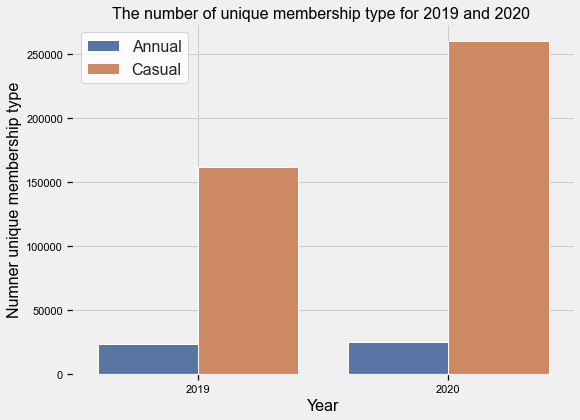

In [8]:
plt.figure(figsize =(8,6))
plt.title('The number of unique membership type for 2019 and 2020 ', fontsize = 16)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = "Year", y="Number", hue = "User_Type", data = df_subID_number)
plt.grid(True)
plt.xlabel('Year',  fontsize = 16)
plt.ylabel('Numner unique membership type',  fontsize = 16);
plt.legend( fontsize = 16);
plt.show();

## Distribution of Number of rides for Annual Members

In [9]:
df_subID_number_dist = df_subID[["User_Type", "Subscription Id", "Start_Time", "Year"]].groupby(
    ["User_Type", "Subscription Id", "Year"]).count().reset_index().rename(columns={"Start_Time": "Number_ride"})
df_subID_number_dist.head()

,User_Type,Subscription Id,Year,Number_ride
0,Annual,65377,2019,109
1,Annual,66217,2019,678
2,Annual,66217,2020,1703
3,Annual,78325,2019,6
4,Annual,82142,2019,485


Text(0, 0.5, 'Probability Density')

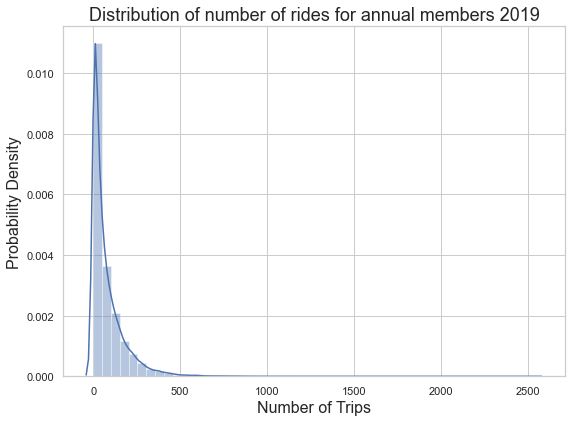

In [10]:
plt.figure(figsize =(8,6))
plt.title('Distribution of number of rides for annual members 2019', fontsize = 18)
sns.set_theme(style="whitegrid")
ax = sns.distplot(df_subID_number_dist[
    (df_subID_number_dist["User_Type"] == "Annual") & (df_subID_number_dist["Year"] == 2019) ]["Number_ride"],
                  rug=False, bins = 50)
plt.xlabel('Number of Trips',  fontsize = 16 )
plt.ylabel('Probability Density',  fontsize = 16 )
# plt.xlim([0,2000])
# plt.ylim([0,0.025]);

## Distribution of Number of used days for Annual Members

In [11]:
df_subID.head()

,ID,Start_Time,End_Time,Duration,Start_Station_id,Start_Station_name,End_Station_id,End_Station_name,User_Type,Subscription Id,...,Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Stn Press Flag,Hmdx,Wind Chill,Weather
3383541,4581278,2019-01-01 00:08:00-05:00,2019-01-01 00:33:00-05:00,1547,7021,Bay St / Albert St,7233,King / Cowan Ave - SMART,Annual,199751,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383542,4581279,2019-01-01 00:10:00-05:00,2019-01-01 00:29:00-05:00,1112,7160,King St W / Tecumseth St,7051,Wellesley St E / Yonge St (Green P),Annual,294730,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383543,4581280,2019-01-01 00:15:00-05:00,2019-01-01 00:25:00-05:00,589,7055,Jarvis St / Carlton St,7013,Scott St / The Esplanade,Annual,197252,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383544,4581281,2019-01-01 00:16:00-05:00,2019-01-01 00:20:00-05:00,259,7012,Elizabeth St / Edward St (Bus Terminal),7235,Bay St / College St (West Side) - SMART,Annual,171700,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383545,4581282,2019-01-01 00:19:00-05:00,2019-01-01 00:24:00-05:00,281,7041,Edward St / Yonge St,7257,Dundas St W / St. Patrick St,Annual,306314,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"


In [12]:
df_subID_days_annual_2019 = df_subID[(df_subID["Year"] == 2019) & (df_subID["User_Type"] == "Annual") ][[ "Subscription Id", "Start_Time", "Duration"]].set_index(
    "Start_Time").groupby(["Subscription Id"]).resample("d")["Duration"].sum().reset_index().groupby(
    "Subscription Id").count().reset_index().drop("Start_Time", axis = 1).rename(columns={"Duration":"Days"})

df_subID_days_annual_2020 = df_subID[(df_subID["Year"] == 2020) & (df_subID["User_Type"] == "Annual") ][[ "Subscription Id", "Start_Time", "Duration"]].set_index(
    "Start_Time").groupby(["Subscription Id"]).resample("d")["Duration"].sum().reset_index().groupby(
    "Subscription Id").count().reset_index().drop("Start_Time", axis = 1).rename(columns={"Duration":"Days"})
# df_subID_days_dist.head()

In [13]:
df_subID_days_casual_2019 = df_subID[(df_subID["Year"] == 2019) & (df_subID["User_Type"] == "Casual") ][[ "Subscription Id", "Start_Time", "Duration"]].set_index(
    "Start_Time").groupby(["Subscription Id"]).resample("d")["Duration"].sum().reset_index().groupby(
    "Subscription Id").count().reset_index().drop("Start_Time", axis = 1).rename(columns={"Duration":"Days"})

# df_subID_days_casual_2020 = df_subID[(df_subID["Year"] == 2020) & (df_subID["User_Type"] == "Casual") ][[ "Subscription Id", "Start_Time", "Duration"]].set_index(
#     "Start_Time").groupby(["Subscription Id"]).resample("d")["Duration"].sum().reset_index().groupby(
#     "Subscription Id").count().reset_index().drop("Start_Time", axis = 1).rename(columns={"Duration":"Days"})

KeyboardInterrupt: 

In [16]:
df_subID_days_annual_2019.to_csv('df_subID_days_annual_2019.csv', index=False )
df_subID_days_annual_2020.to_csv('df_subID_days_annual_2020.csv', index=False )
df_subID_days_casual_2019.to_csv('df_subID_days_casual_2019.csv', index=False )


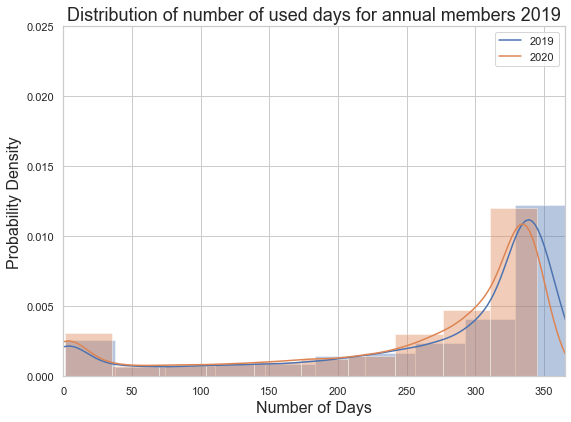

In [38]:
plt.figure(figsize =(8,6))
plt.title('Distribution of number of used days for annual members 2019', fontsize = 18)
sns.set_theme(style="whitegrid")
ax = sns.distplot(df_subID_days_annual_2019["Days"], rug=False, bins = 10)
ax = sns.distplot(df_subID_days_annual_2020["Days"], rug=False, bins = 10)

plt.xlabel('Number of Days',  fontsize = 16 )
plt.ylabel('Probability Density',  fontsize = 16 )
plt.xlim([0,365])
plt.ylim([0,0.025]);
plt.legend(["2019", "2020"])
plt.show();

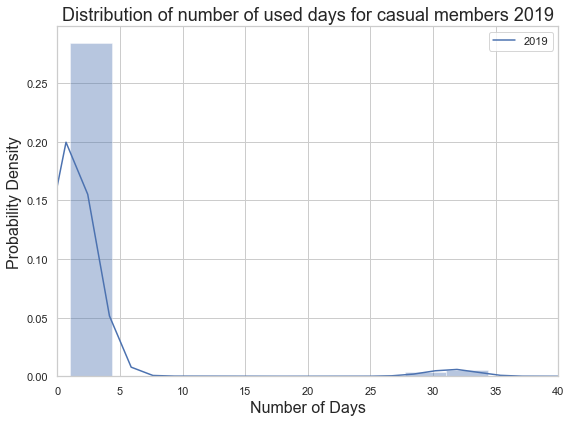

In [176]:
plt.figure(figsize =(8,6))
plt.title('Distribution of number of used days for casual members 2019', fontsize = 18)
sns.set_theme(style="whitegrid")
ax = sns.distplot(df_subID_days_casual_2019["Days"], rug=False, bins = 100)

plt.xlabel('Number of Days',  fontsize = 16 )
plt.ylabel('Probability Density',  fontsize = 16 )
plt.xlim([0,40])
# plt.ylim([0,0.025]);
plt.legend(["2019"])
plt.show();

How many annual members ride more than what 

In [78]:
lst_ranges_ride_days = ["0 - 65", "65 - 165", "165 - 265", "265 - 365"]
lst_ranges = [0,65,165,265,365]
lst_ride_day_2019 = []
lst_ride_day_2020 = []
temp_sum_2019 = 0
temp_sum_2020 = 0

for i in range(len(lst_ranges) - 1):
    temp_sum_2019 += df_subID_days_annual_2019[
        (df_subID_days_annual_2019["Days"] > lst_ranges[i]) &
        (df_subID_days_annual_2019["Days"] <= lst_ranges[i+1])].shape[0]
    lst_ride_day_2019.append(df_subID_days_annual_2019[
        (df_subID_days_annual_2019["Days"] > lst_ranges[i]) &
        (df_subID_days_annual_2019["Days"] <= lst_ranges[i+1])].shape[0])
    
for i in range(len(lst_ranges) - 1):
    temp_sum_2020 += df_subID_days_annual_2019[
        (df_subID_days_annual_2020["Days"] > lst_ranges[i]) &
        (df_subID_days_annual_2020["Days"] <= lst_ranges[i+1])].shape[0]
    lst_ride_day_2020.append(df_subID_days_annual_2019[
        (df_subID_days_annual_2020["Days"] > lst_ranges[i]) &
        (df_subID_days_annual_2020["Days"] <= lst_ranges[i+1])].shape[0]) 
    
lst_ride_day_2019_new = [i/temp_sum_2019 for i in lst_ride_day_2019]
lst_ride_day_2020_new = [i/temp_sum_2019 for i in lst_ride_day_2020]

df_temp1 = pd.DataFrame({"ranges" : lst_ranges_ride_days,
              "days"   : lst_ride_day_2019_new,
              "year"   : 2019
             })
df_temp2 = pd.DataFrame({"ranges" : lst_ranges_ride_days,
              "days"   : lst_ride_day_2020_new,
              "year"   : 2020
             })
df_temp_rides_ranges = pd.concat([df_temp1, df_temp2], axis=0)



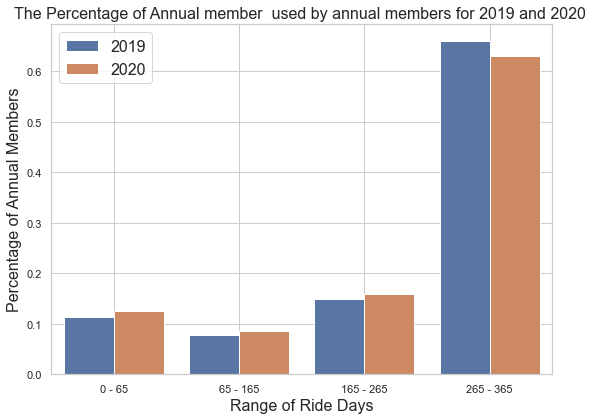

In [81]:
plt.figure(figsize =(8,6))
plt.title('The Percentage of Annual member  used by annual members for 2019 and 2020 ', fontsize = 16)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = "ranges", y="days", hue = "year", data = df_temp_rides_ranges)
plt.grid(True)
plt.xlabel('Range of Ride Days',  fontsize = 16)
plt.ylabel('Percentage of Annual Members',  fontsize = 16);
plt.legend( fontsize = 16);
plt.show();

Let's take a look at bikes and their story


In [82]:
df_subID.head()

,ID,Start_Time,End_Time,Duration,Start_Station_id,Start_Station_name,End_Station_id,End_Station_name,User_Type,Subscription Id,...,Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Stn Press Flag,Hmdx,Wind Chill,Weather
3383541,4581278,2019-01-01 00:08:00-05:00,2019-01-01 00:33:00-05:00,1547,7021,Bay St / Albert St,7233,King / Cowan Ave - SMART,Annual,199751,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383542,4581279,2019-01-01 00:10:00-05:00,2019-01-01 00:29:00-05:00,1112,7160,King St W / Tecumseth St,7051,Wellesley St E / Yonge St (Green P),Annual,294730,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383543,4581280,2019-01-01 00:15:00-05:00,2019-01-01 00:25:00-05:00,589,7055,Jarvis St / Carlton St,7013,Scott St / The Esplanade,Annual,197252,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383544,4581281,2019-01-01 00:16:00-05:00,2019-01-01 00:20:00-05:00,259,7012,Elizabeth St / Edward St (Bus Terminal),7235,Bay St / College St (West Side) - SMART,Annual,171700,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"
3383545,4581282,2019-01-01 00:19:00-05:00,2019-01-01 00:24:00-05:00,281,7041,Edward St / Yonge St,7257,Dundas St W / St. Patrick St,Annual,306314,...,4.0,98.0,8.0,11.0,4.8,98.49,NaN,NaN,NaN,"Rain,Fog"


Unique number of bike in each year

In [97]:
unique_bike_2019 = df_subID[["Year", "Bike Id"]][df_subID["Year"] == 2019]["Bike Id"].unique().shape[0]
unique_bike_2020 = df_subID[["Year", "Bike Id"]][df_subID["Year"] == 2020]["Bike Id"].unique().shape[0]
df_bikes_year = pd.DataFrame({
    "Year" : [2019, 2020],
    "unique_Bikes" : [unique_bike_2019, unique_bike_2020]
})
df_bikes_year

,Year,unique_Bikes
0,2019,4901
1,2020,6759


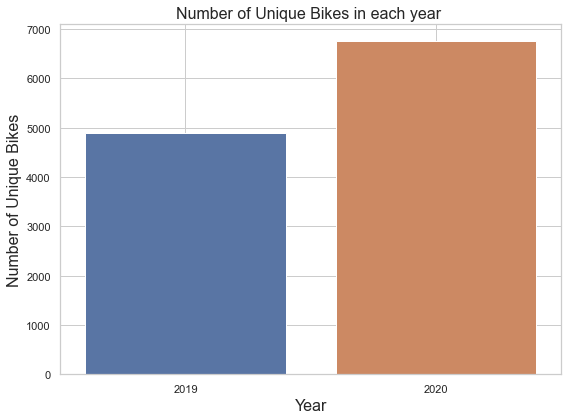

In [100]:
plt.figure(figsize =(8,6))
plt.title('Number of Unique Bikes in each year ', fontsize = 16)
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = "Year", y="unique_Bikes",  data = df_bikes_year)
plt.grid(True)
plt.xlabel('Year',  fontsize = 16)
plt.ylabel('Number of Unique Bikes',  fontsize = 16);
# plt.legend( fontsize = 16);
plt.show();

In [128]:
df_bike_rides_number = df_subID[["Start_Time" , "Duration", "Year", "Bike Id"]].groupby(
    ["Bike Id", "Year"]).count()["Duration"].reset_index().rename(
    columns={"Duration":"number_rides"}).sort_values(by="number_rides", ascending = False)
df_bike_rides_number.head()

,Bike Id,Year,number_rides
7268,3732,2019,1003
6041,3110,2019,970
7209,3702,2019,967
6341,3264,2019,964
5593,2883,2019,963


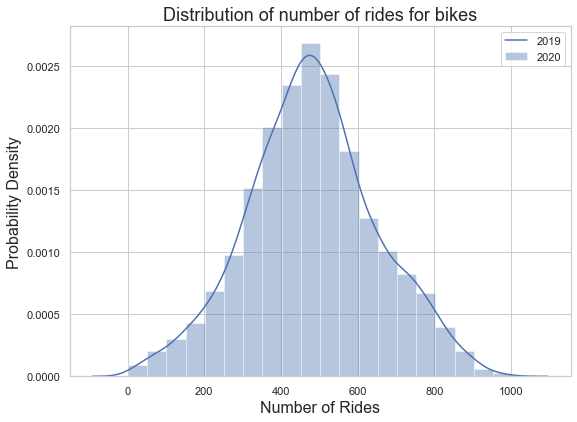

In [173]:
plt.figure(figsize =(8,6))
plt.title('Distribution of number of rides for bikes', fontsize = 18)
sns.set_theme(style="whitegrid")
ax = sns.distplot(df_bike_rides_number[df_bike_rides_number["Year"] == 2019 ]["number_rides"], rug=False, bins = 20)
# ax = sns.distplot(df_bike_rides_number[df_bike_rides_number["Year"] == 2020 ]["number_rides"], rug=False, bins = 20)

plt.xlabel('Number of Rides',  fontsize = 16 )
plt.ylabel('Probability Density',  fontsize = 16 )
# plt.xlim([0,365])
# plt.ylim([0,0.025]);
plt.legend(["2019", "2020"])
plt.show();

Let's take a look at the ride duration for each bike

In [130]:
df_bike_rides_duration = df_subID[["Start_Time" , "Duration", "Year", "Bike Id"]].groupby(
    ["Bike Id", "Year"]).sum()["Duration"].reset_index().rename(
    columns={"Duration":"Rides_Duration"}).sort_values(by="Rides_Duration", ascending = False)
df_bike_rides_duration.head()

,Bike Id,Year,Rides_Duration
7209,3702,2019,736050
5593,2883,2019,729906
11398,6627,2020,729208
11446,6675,2020,714956
7268,3732,2019,713537


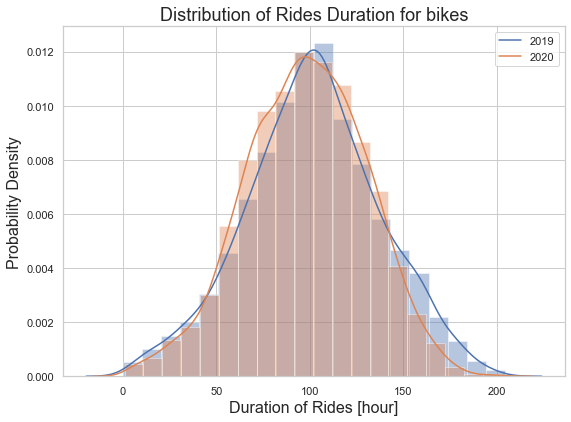

In [133]:
plt.figure(figsize =(8,6))
plt.title('Distribution of Rides Duration for bikes', fontsize = 18)
sns.set_theme(style="whitegrid")
ax = sns.distplot(df_bike_rides_duration[df_bike_rides_duration["Year"] == 2019 ]["Rides_Duration"] / 3600, rug=False, bins = 20)
ax = sns.distplot(df_bike_rides_duration[df_bike_rides_duration["Year"] == 2020 ]["Rides_Duration"] / 3600, rug=False, bins = 20)

plt.xlabel('Duration of Rides [hour]',  fontsize = 16 )
plt.ylabel('Probability Density',  fontsize = 16 )
# plt.xlim([0,365])
# plt.ylim([0,0.025]);
plt.legend(["2019", "2020"])
plt.show();

Let's take a look at the effect of Weather per number of rides in each day
For this we use the merged_df

In [134]:
merged_df.columns

Index(['ID', 'Start_Time', 'End_Time', 'Duration', 'Start_Station_id',
       'Start_Station_name', 'End_Station_id', 'End_Station_name', 'User_Type',
       'Subscription Id', 'Bike Id', 'merge_time', 'Longitude (x)',
       'Latitude (y)', 'Date/Time', 'Year', 'Month', 'Day', 'Time',
       'Temp (°C)', 'Dew Point Temp (°C)', 'Rel Hum (%)', 'Wind Dir (10s deg)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)',
       'Stn Press Flag', 'Hmdx', 'Wind Chill', 'Weather'],
      dtype='object')

In [145]:
df_weather_bikes = merged_df[["Start_Time", "Duration", "User_Type", "Year", "Month", "Day", "Time", 
           "Temp (°C)", "Rel Hum (%)", "Wind Spd (km/h)", "Visibility (km)",
           "Hmdx", "Wind Chill", "Weather"]].set_index("Start_Time")
df_weather_bikes.head()

,Duration,User_Type,Year,Month,Day,Time,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Hmdx,Wind Chill,Weather
Start_Time,,,,,,,,,,,,,
2017-01-01 00:03:00-05:00,274,Annual,2017.0,1.0,1.0,00:00,1.5,69.0,39.0,16.1,NaN,NaN,NaN
2017-01-01 00:03:00-05:00,538,Annual,2017.0,1.0,1.0,00:00,1.5,69.0,39.0,16.1,NaN,NaN,NaN
2017-01-01 00:05:00-05:00,992,Annual,2017.0,1.0,1.0,00:00,1.5,69.0,39.0,16.1,NaN,NaN,NaN
2017-01-01 00:09:00-05:00,1005,Annual,2017.0,1.0,1.0,00:00,1.5,69.0,39.0,16.1,NaN,NaN,NaN
2017-01-01 00:14:00-05:00,645,Annual,2017.0,1.0,1.0,00:00,1.5,69.0,39.0,16.1,NaN,NaN,NaN


In [169]:
df_weather_bikes_daily = df_weather_bikes[[
    "Duration", "User_Type", "Temp (°C)", "Rel Hum (%)", "Wind Spd (km/h)", "Visibility (km)"]].resample('h').agg(
    {"Temp (°C)": "mean", "Rel Hum (%)": "mean", "Wind Spd (km/h)": "mean", "Visibility (km)": "mean",
     "Duration": "sum"}).iloc[4: , :].reset_index().rename(columns = {"Duration": "total_rides"})
df_weather_bikes_daily.head()

,Start_Time,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),total_rides
0,2017-01-01 00:00:00-05:00,1.500000,68.222222,37.444444,16.1,11885
1,2017-01-01 01:00:00-05:00,1.307692,67.384615,33.846154,16.1,8057
2,2017-01-01 02:00:00-05:00,1.066667,67.666667,33.666667,16.1,5781
3,2017-01-01 03:00:00-05:00,1.240000,66.600000,33.400000,16.1,5856
4,2017-01-01 04:00:00-05:00,1.180000,67.200000,28.800000,16.1,3685


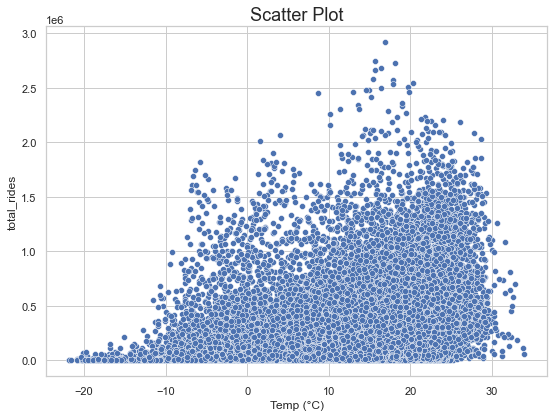

In [170]:
plt.figure(figsize =(8,6))
plt.title("Scatter Plot", size = 18)
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(x = "Temp (°C)" ,y = "total_rides" , data = df_weather_bikes_daily)
# (df_bike_rides_duration[df_bike_rides_duration["Year"] == 2019 ]["Rides_Duration"] / 3600, rug=False, bins = 20)
# ax = sns.distplot(df_bike_rides_duration[df_bike_rides_duration["Year"] == 2020 ]["Rides_Duration"] / 3600, rug=False, bins = 20)

# plt.xlabel('Duration of Rides [hour]',  fontsize = 16 )
# plt.ylabel('Probability Density',  fontsize = 16 )
# # plt.xlim([0,365])
# # plt.ylim([0,0.025]);
# plt.legend(["2019", "2020"])
# plt.show();